In [33]:
import matplotlib.pyplot as plt
import json
import seaborn
seaborn.set()
from pathlib import Path
import numpy as np

In [34]:
game = "hex"
results = []
for result_file in Path(f"{game}/simple_rollouts/").iterdir():
    with open(result_file) as f:
        result = json.load(f)
        results.append(result)
data = np.average(np.array(results), axis=0)

In [35]:
draws = np.average(data, axis=3)[:, :, 1]
wins = np.average(data, axis=3)[:, :, 0] + 0.5 * draws
# losses = np.average(data, axis=3)[:, :, 2] + 0.5 * draws

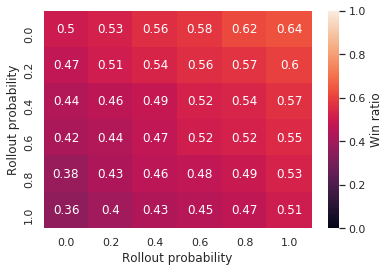

In [36]:
labels = [f"{label / 100}" for label in range(0, 101, 20)]
ax = seaborn.heatmap(wins, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels, cbar_kws={"label": "Win ratio"})
ax.set_xlabel("Rollout probability")
ax.set_ylabel("Rollout probability")
ax

In [37]:
ax.figure.savefig(f"{game}_simple_rollouts_wins", dpi=300)

In [38]:
# ax = seaborn.heatmap(draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Draws")
# ax

In [39]:
# ax = seaborn.heatmap(wins + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Wins + draws")
# ax

In [40]:
# ax = seaborn.heatmap(losses, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses")
# ax

In [41]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax

In [42]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax

In [43]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax

In [44]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax

In [45]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax

In [46]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax

In [47]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax

In [48]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax

In [ ]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax

In [ ]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax

In [ ]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax

In [ ]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax

In [ ]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax

In [ ]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax

In [116]:
# ax = seaborn.heatmap(losses + draws, annot=True, vmin=0.0, vmax=1.0, xticklabels=labels, yticklabels=labels)
# ax.set_title("Losses + draws")
# ax